# Data exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from scipy import fftpack

In [25]:
plt.rcParams['figure.dpi'] = 100

from matplotlib import rc
#rc('font',size=14, **{'family':'sans-serif','sans-serif':['Helvetica']})
rc('font', family='times new roman', size=18)
rc('text', usetex=True)

In [2]:
# takes a lot of time! Is there a way to reduce time
filepath = "../data/Synthetic_Basic/"

#mydateparser = lambda x: pd.datetime.strptime(x, "%Y-%m-%d %H:%M:%S%z")
#data     = pd.read_csv(filepath + "Synthetic_Basic_0.csv", date_parser=mydateparser, parse_dates=[0])
#data.head()

df = pd.read_csv(filepath + "Synthetic_Basic_0.csv")

In [3]:
df = df.rename(columns={"Unnamed: 0": "datetime"})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2629440 entries, 0 to 2629439
Data columns (total 7 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   datetime                 object 
 1   Power                    float64
 2   POA                      float64
 3   Tamb                     float64
 4   Wind                     float64
 5   Degradation_rate_per_yr  float64
 6   soiling                  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 140.4+ MB


In [5]:
df["datetime"] = pd.to_datetime(df["datetime"])
df["datetime"] = df["datetime"].dt.tz_localize(None)
time_df        = df.set_index("datetime")
time_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2629440 entries, 2015-01-01 00:00:00 to 2019-12-31 23:59:00
Data columns (total 6 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Power                    float64
 1   POA                      float64
 2   Tamb                     float64
 3   Wind                     float64
 4   Degradation_rate_per_yr  float64
 5   soiling                  int64  
dtypes: float64(5), int64(1)
memory usage: 140.4 MB


In [6]:
time_df.head()

,Power,POA,Tamb,Wind,Degradation_rate_per_yr,soiling
datetime,,,,,,
2015-01-01 00:00:00,-1.0,0.0,5.1,0.0,-0.00948,1
2015-01-01 00:01:00,-1.0,0.0,5.1,0.0,-0.00948,1
2015-01-01 00:02:00,-1.0,0.0,5.1,0.0,-0.00948,1
2015-01-01 00:03:00,-1.0,0.0,5.1,0.0,-0.00948,1
2015-01-01 00:04:00,-1.0,0.0,5.1,0.0,-0.00948,1


In [10]:
time_df.tail()

,Power,POA,Tamb,Wind,Degradation_rate_per_yr,soiling
datetime,,,,,,
2019-12-31 23:55:00,-1.0,0.0,5.2,0.0,-0.00948,1
2019-12-31 23:56:00,-1.0,0.0,5.2,0.0,-0.00948,1
2019-12-31 23:57:00,-1.0,0.0,5.2,0.0,-0.00948,1
2019-12-31 23:58:00,-1.0,0.0,5.2,0.0,-0.00948,1
2019-12-31 23:59:00,-1.0,0.0,5.2,0.0,-0.00948,1


In [11]:
time_df.describe()

,Power,POA,Tamb,Wind,Degradation_rate_per_yr,soiling
count,2.629440e+06,2.629440e+06,2.629440e+06,2629440.0,2.629440e+06,2629440.0
mean,5.296321e+02,2.319570e+02,1.647911e+01,0.0,-9.480000e-03,1.0
std,6.975581e+02,3.074970e+02,7.173076e+00,0.0,3.989865e-17,0.0
min,-1.000000e+00,0.000000e+00,2.900000e+00,0.0,-9.480000e-03,1.0
25%,-1.000000e+00,0.000000e+00,9.900000e+00,0.0,-9.480000e-03,1.0
50%,-1.000000e+00,0.000000e+00,1.740000e+01,0.0,-9.480000e-03,1.0
75%,1.186000e+03,4.820000e+02,2.260000e+01,0.0,-9.480000e-03,1.0
max,1.827000e+03,9.500000e+02,2.790000e+01,0.0,-9.480000e-03,1.0


In [33]:
# there are no missing values as stated by Daniel

## Data Visualization

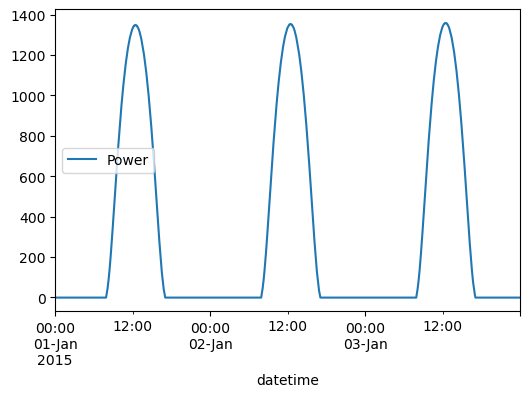

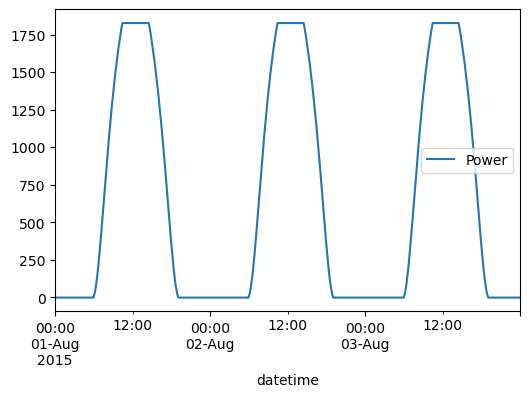

In [12]:
# Plot power only for 1st day
mask_df = time_df.loc["2015-01-01 00:00:00":"2015-01-03 23:59:00"]
mask_df.plot(y="Power")

mask_df = time_df.loc["2015-08-01 00:00:00":"2015-08-03 23:59:00"]
mask_df.plot(y="Power")

In [8]:
def plot_features(df, tmin = 0, tmax = -1):
    num_subplots = df.keys().shape[0]
    df[tmin:tmax].plot(subplots=True, layout=(num_subplots, 1))
    plt.show()

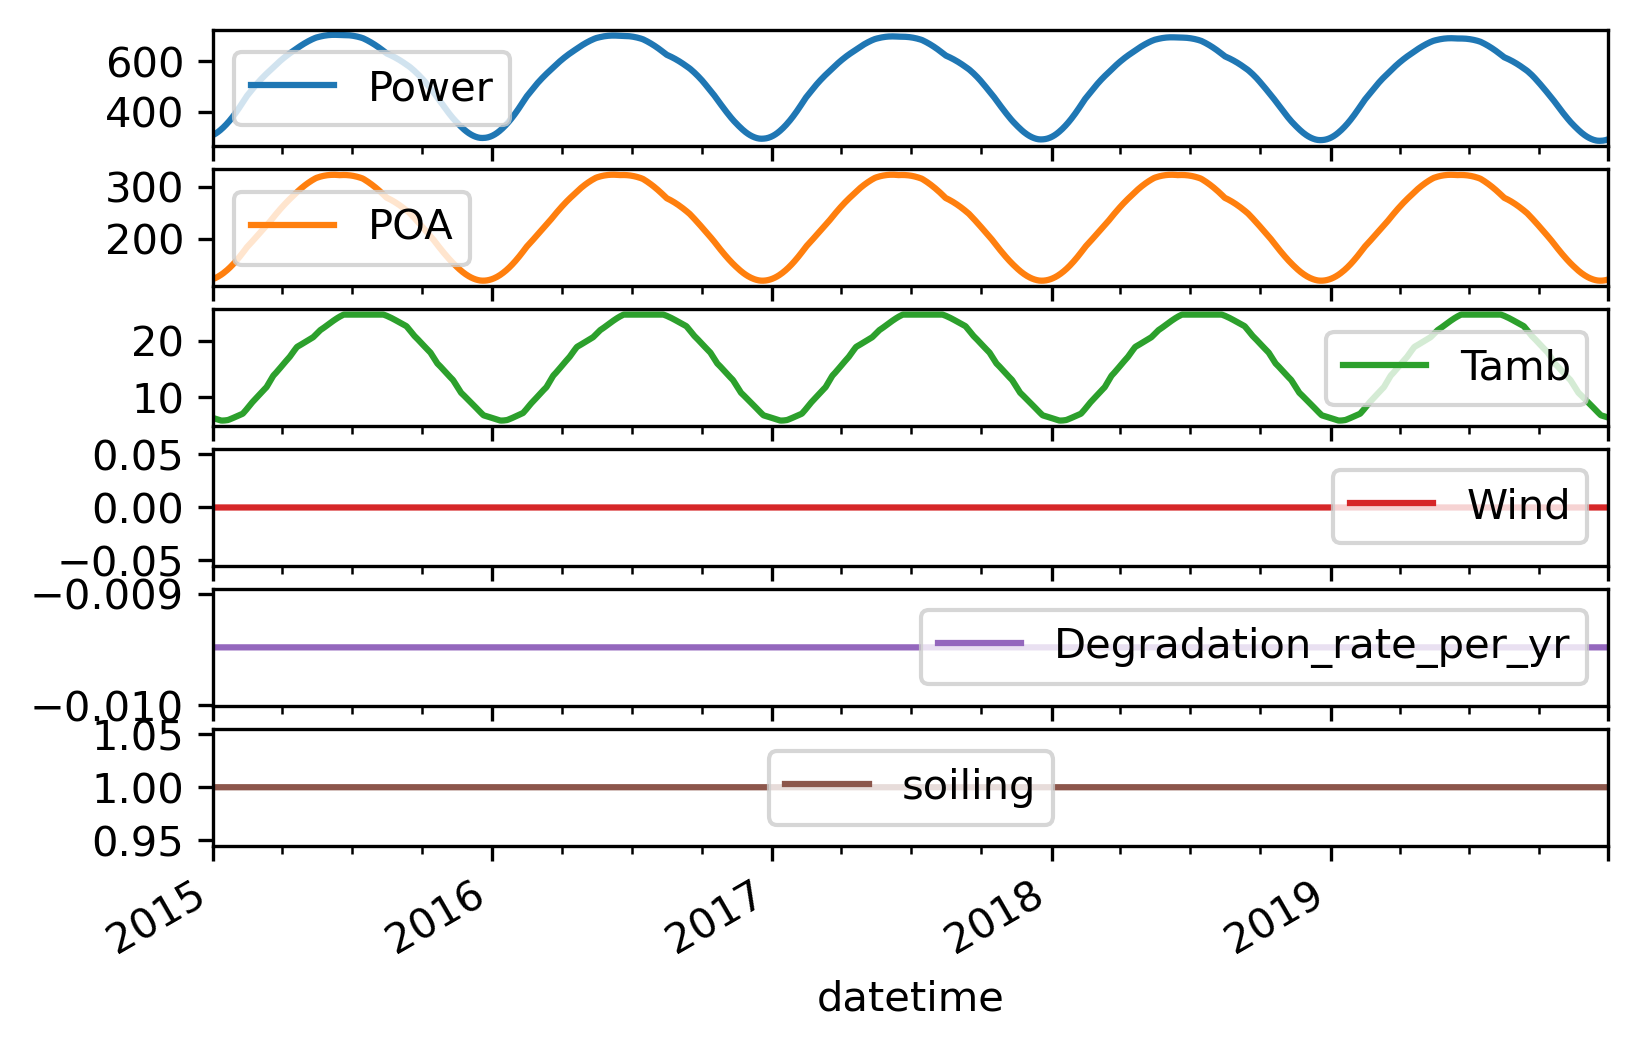

In [9]:
# downdgrade data (high frequency -> low frequency) & plot
plot_features(time_df.resample("d").mean()) 

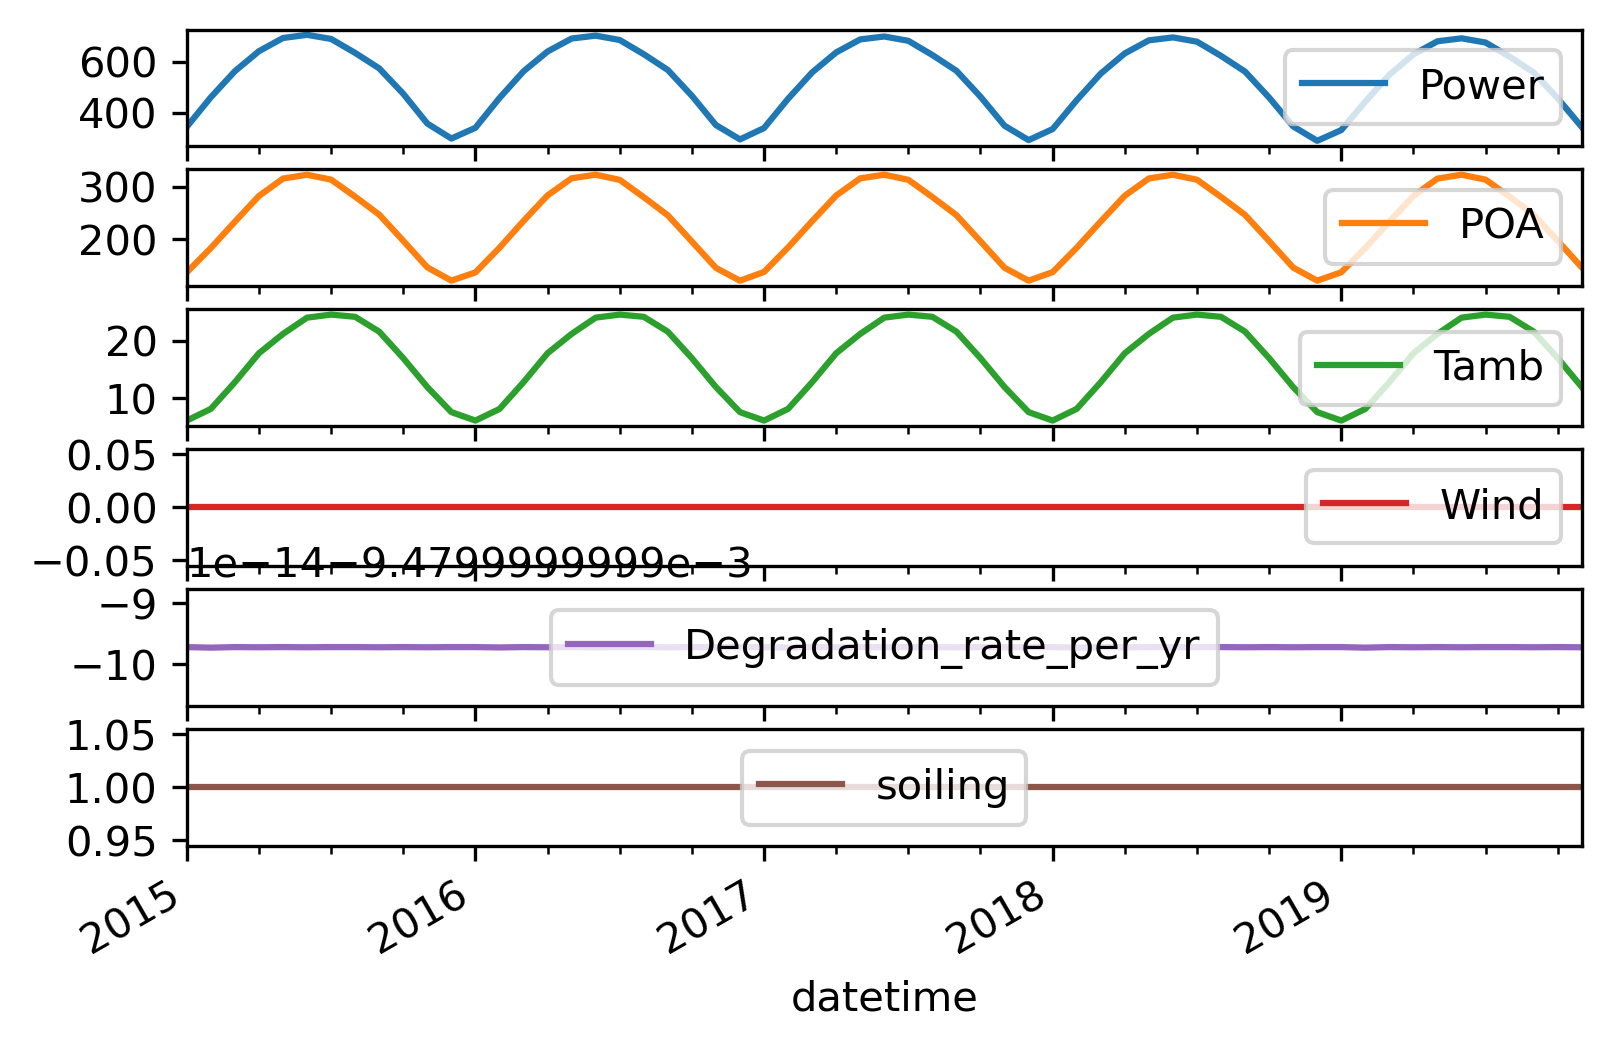

In [10]:
# downdgrade data (high frequency -> low frequency) & plot
plot_features(time_df.resample("m").mean()) 

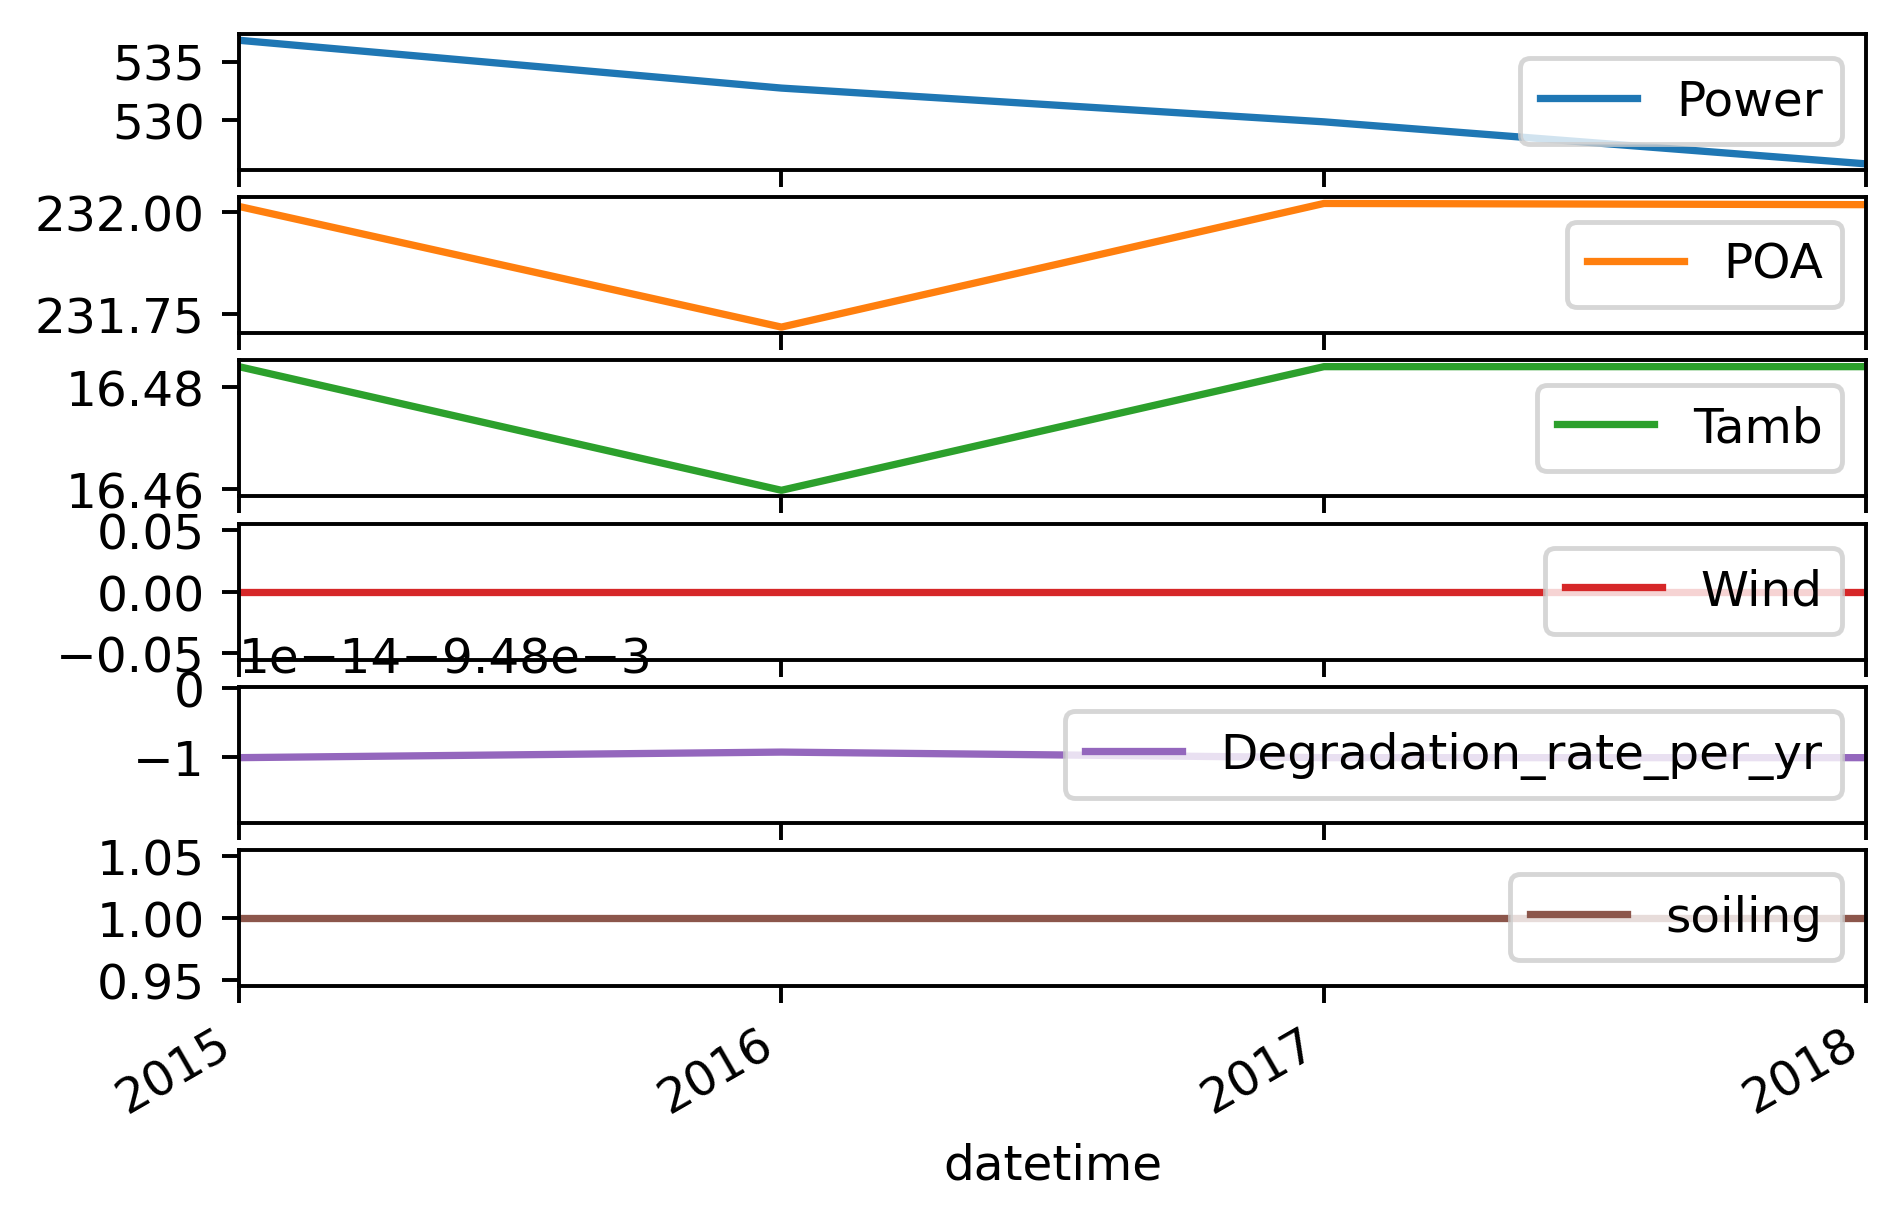

In [62]:
plot_features(test.resample("y").mean()) 

**What about outliers?** 

**What about autocorrelation**

In [ ]:
mask_df = time_df.loc["2015-01-01 00:00:00":"2016-01-01 00:00:00"]
plot_acf(mask_df["Power"], lags=25)

**Time series decomposition**

<ipython-input-45-c09274a3d8ce>:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposed_power = sm.tsa.seasonal_decompose(time_df["Power"], freq=360) # The frequncy is annual


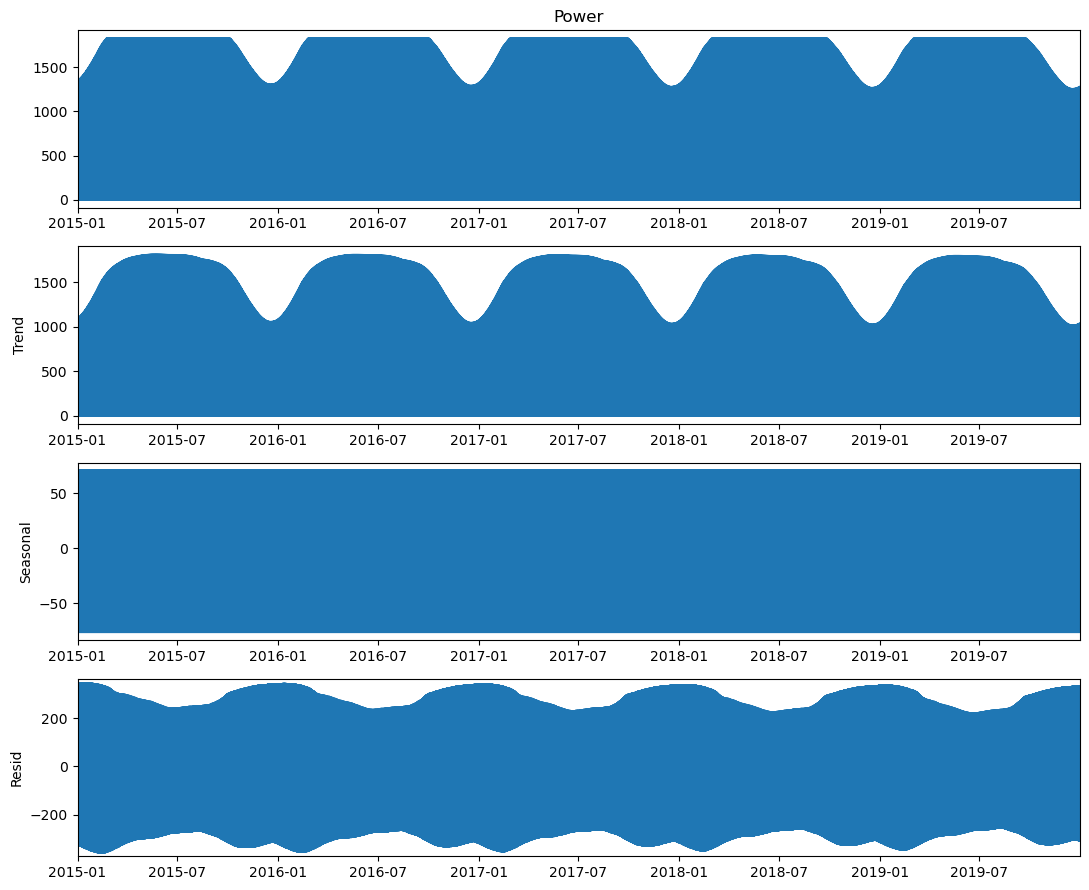

In [45]:
# Now, for decomposition...
plt.rcParams['figure.figsize'] = 11, 9
decomposed_power = sm.tsa.seasonal_decompose(time_df["Power"], freq=360) # The frequncy is annual
figure = decomposed_power.plot()
plt.show()

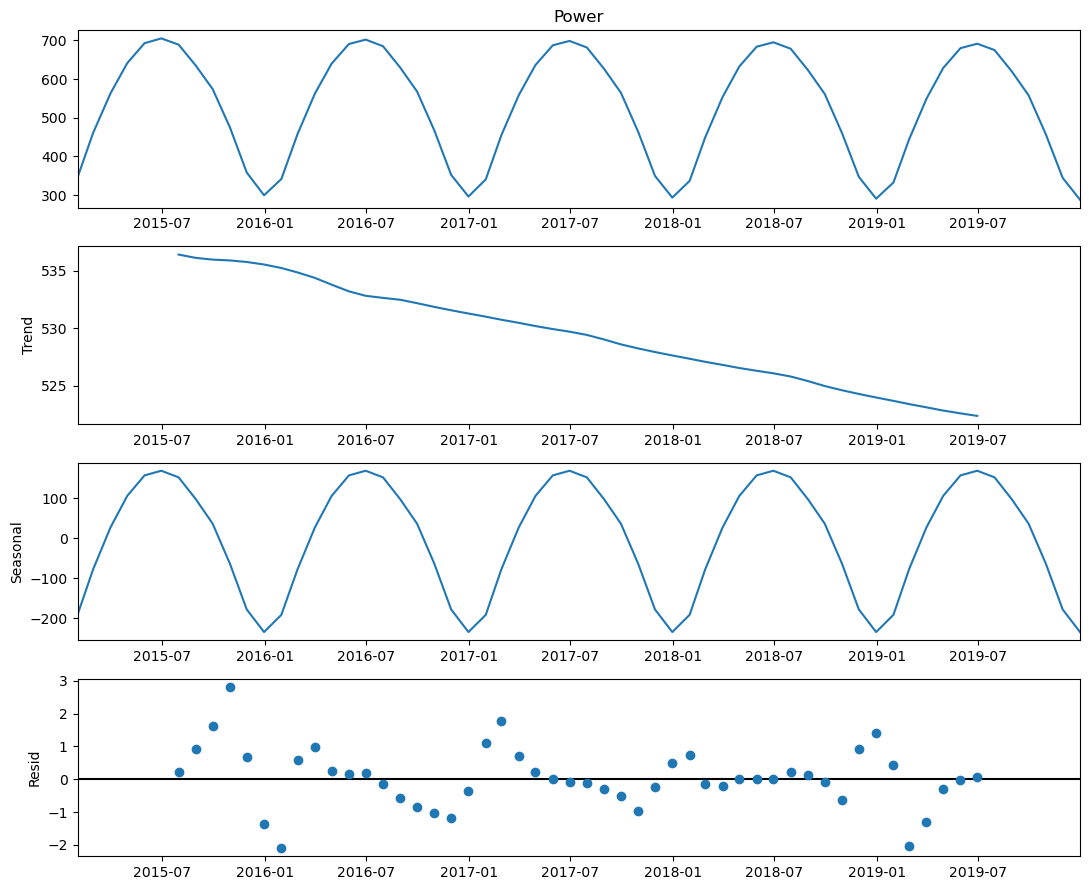

In [38]:
time_df_avg_day = time_df.resample("m").mean()
plt.rcParams['figure.figsize'] = 11, 9
decomposed_power = sm.tsa.seasonal_decompose(time_df_avg_day["Power"], model="additive")
figure   = decomposed_power.plot()
trend    = decomposed_power.trend
seasonal = decomposed_power.seasonal
res      = decomposed_power.resid
plt.show()

In [35]:
mean_power_year = trend.resample("y").max()

for i in range(len(mean_power_year)-1):
    print ((mean_power_year.iloc[i+1] - mean_power_year.iloc[i]))
    
print (mean_power_year)


-1.1677063266149617
-4.230164350441669
-3.654959392956812
-3.661759165919989
datetime
2015-12-31    536.396861
2016-12-31    535.229155
2017-12-31    530.998991
2018-12-31    527.344031
2019-12-31    523.682272
Freq: A-DEC, Name: trend, dtype: float64


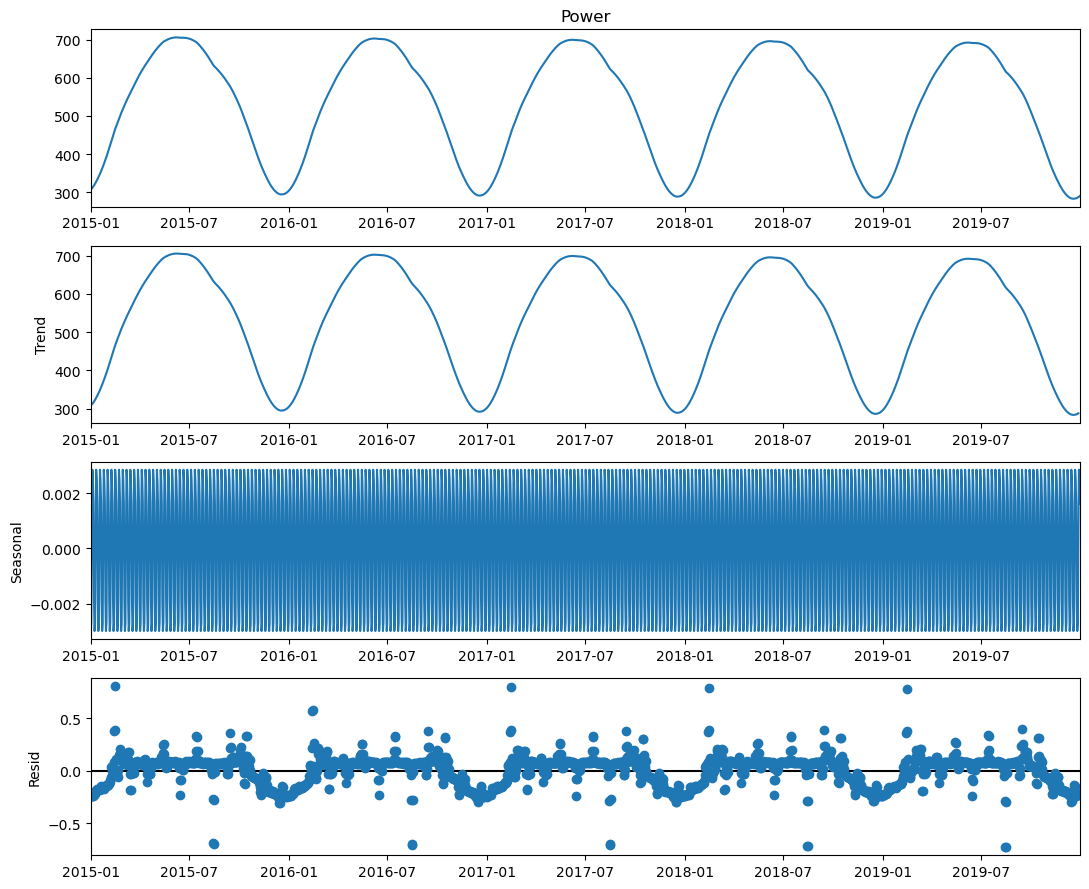

In [40]:
time_df_avg_day = time_df.resample("d").mean()
plt.rcParams['figure.figsize'] = 11, 9
decomposed_power = sm.tsa.seasonal_decompose(time_df_avg_day["Power"], model="additive")
figure   = decomposed_power.plot()
trend    = decomposed_power.trend
seasonal = decomposed_power.seasonal
res      = decomposed_power.resid
plt.show()

- Fourier spectrum decomposition

In [8]:
# downgrade data to monthly frequency
time_df_avg_month   = time_df.resample("m").mean()
power_avg_month_fft = fftpack.fft(time_df_avg_month["Power"].values) # Fourier transform

print(power_avg_month_fft.shape)

(60,)


<ipython-input-17-bc4211d50e08>:12: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  ax[1].stem(fr, power_m) # plot freq domain


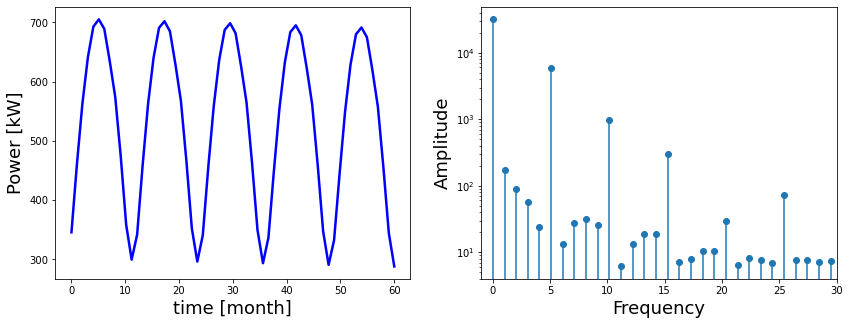

In [17]:
n_month  = 60
t        = np.linspace(0, n_month, n_month)
fr       = np.linspace(0, n_month, n_month)
power_m  = np.abs(power_avg_month_fft)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,5))
ax[0].plot(t, time_df_avg_month["Power"].values, lw=2.5, color="blue")    # plot time series
ax[0].set_ylabel("Power [kW]", fontsize=18)
ax[0].set_xlabel("time [month]", fontsize=18)
ax[1].set_ylabel("Amplitude", fontsize=18)
ax[1].set_xlabel("Frequency", fontsize=18)
ax[1].stem(fr, power_m) # plot freq domain
ax[1].set_xlim([-1, 30])
ax[1].set_yscale("log")

fig.savefig("/home/maria/figs/monthly_mean_power_fft.png", bbox_inches="tight")

/home/maria/miniconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


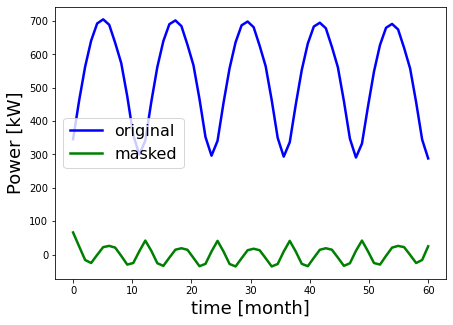

In [16]:
# filter out certain frequencies
pos               = np.where((power_m >1e3))
power_m_mask      = np.copy(power_m)
power_m_mask[pos] = 0

# inverse fourier transform
power_avg_month_inv = fftpack.ifft(power_m_mask)

# plot original and filter out signal
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,5))
ax.plot(t, time_df_avg_month["Power"].values, lw=2.5, color="blue", label="original")    # plot time series
ax.plot(t, power_avg_month_inv, lw=2.5, color="green", label="masked") # plot freq domain

ax.set_ylabel("Power [kW]", fontsize=18)
ax.set_xlabel("time [month]", fontsize=18)

ax.legend(fontsize=16)

fig.savefig("/home/maria/figs/monthly_mean_power_ifft.png", bbox_inches="tight")

(60,)


<ipython-input-116-ab1f7dce0ddc>:14: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  ax[1].stem(fr, power_m) # plot freq domain


<StemContainer object of 3 artists>

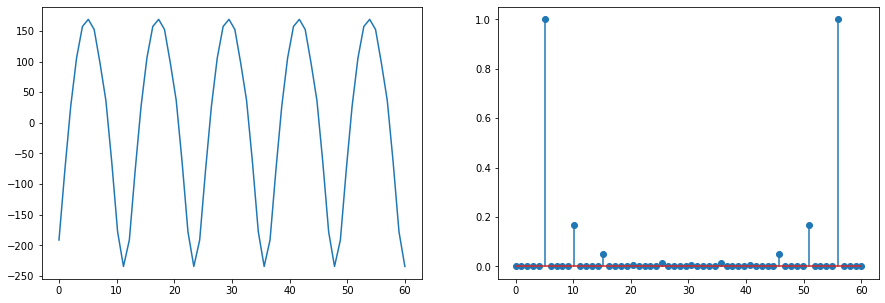

In [116]:
# downgrade data to monthly frequency
time_df_avg_month   = time_df.resample("m").mean()
power_avg_month_fft = fftpack.fft(seasonal.values) # Fourier transform

print(power_avg_month_fft.shape)

n_month  = 60
t        = np.linspace(0, n_month, n_month)
fr       = np.linspace(0, n_month, n_month)
power_m  = 1/np.max(np.abs(power_avg_month_fft))*np.abs(power_avg_month_fft)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax[0].plot(t, seasonal.values)    # plot time series
ax[1].stem(fr, power_m) # plot freq domain
#ax[1].set_xlim([-1, 40])

**ARIMA model**

- Is the generation of observations an ARIMA process?

Text(0, 0.5, 'Power [kW]')

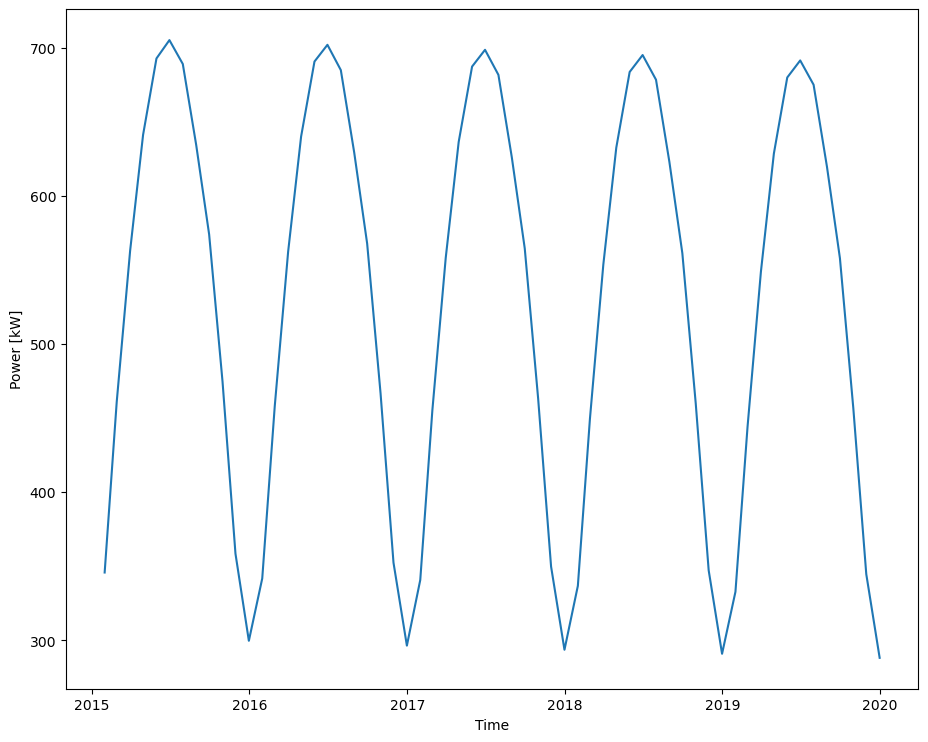

In [51]:
plt.rcParams['figure.dpi'] = 100
time_df_avg_month = time_df.resample("m").mean()
fig, ax = plt.subplots()
ax.plot(time_df_avg_month["Power"])
ax.set_xlabel("Time")
ax.set_ylabel("Power [kW]")

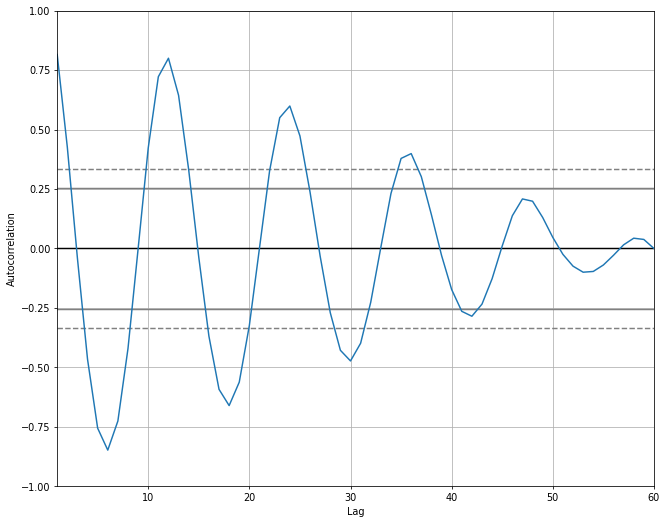

In [58]:
plt.rcParams['figure.dpi'] = 70

time_df_avg_month = time_df.resample("m").mean()

pd.plotting.autocorrelation_plot(time_df_avg_month["Power"]) # this might help in setting order of autoregressive model

In [55]:
time_df_avg_month.head()

,Power,POA,Tamb,Wind,Degradation_rate_per_yr,soiling
datetime,,,,,,
2015-01-31,345.733580,137.530981,6.123851,0.0,-0.00948,1
2015-02-28,461.069072,183.565253,8.159273,0.0,-0.00948,1
2015-03-31,562.943705,233.468324,12.819332,0.0,-0.00948,1
2015-04-30,641.139931,282.337315,17.866049,0.0,-0.00948,1
2015-05-31,692.713575,315.286738,21.240374,0.0,-0.00948,1


Is there something strange in the above autocorrelation plot? 
Shouldn't I expect sth singular with respect to zero???

In [49]:
model = ARIMA(time_df_avg_month["Power"].values, order=(6,1,0))
result = model.fit()
print(result.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   59
Model:                 ARIMA(6, 1, 0)   Log Likelihood                -262.566
Method:                       css-mle   S.D. of innovations             19.741
Date:                Wed, 05 Aug 2020   AIC                            541.131
Time:                        11:35:49   BIC                            557.751
Sample:                             1   HQIC                           547.619
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2423      3.437      0.071      0.944      -6.494       6.979
ar.L1.D.y      1.2699      0.127      9.968      0.000       1.020       1.520
ar.L2.D.y     -0.8247      0.210     -3.929      0.0

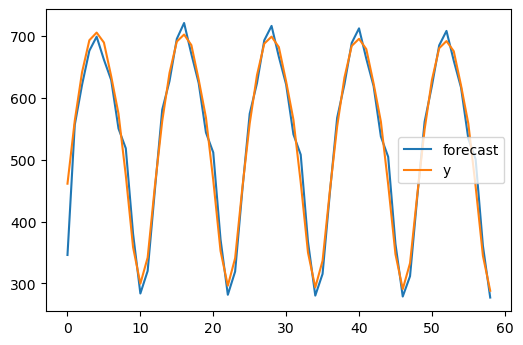

In [50]:
result.plot_predict()
plt.show()

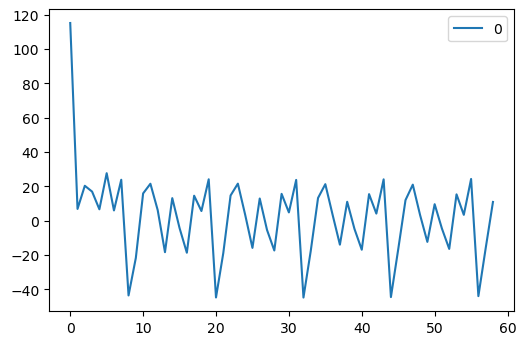

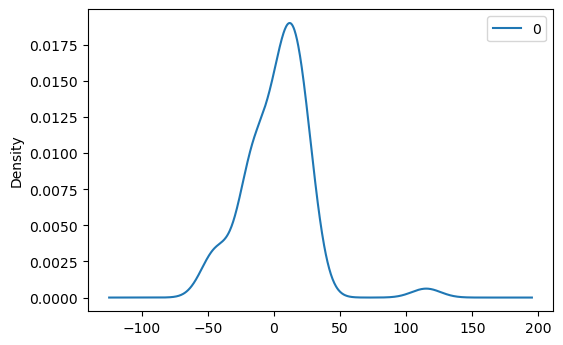

In [51]:
residuals = pd.DataFrame(result.resid)
residuals.plot()
residuals.plot(kind="kde")

there is a non-zero mean in the distribution of residuals, pointing out to a bias in the prediction

In [52]:
rmse = np.sqrt(mean_squared_error(time_df_avg_month["Power"].iloc[20:41].values, result.predict(start=20,end=40)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 522.9501504331375.
